### import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras import models
from keras import layers

In [2]:
# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

In [3]:
# Display the first few rows to ensure it's loaded correctly
#print(df.head())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   label               120 non-null    int64  
 1   Area(cm^2)          120 non-null    float64
 2   W/L                 120 non-null    float64
 3   Patiole Length(mm)  120 non-null    float64
 4   Number of Pairs     120 non-null    int64  
 5   Ratio               120 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 5.8 KB
None


In [4]:
# Identify the target variable (assuming the column name is 'label')
target = df['label']

In [5]:
# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

In [6]:
# Verify the shapes to ensure they are correct
print("Target shape:", target.shape)
print("Features shape:", features.shape)

Target shape: (120,)
Features shape: (120, 5)


In [7]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [8]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder with the updated parameter
encoder = OneHotEncoder(sparse_output=False)


In [9]:
# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

In [10]:
# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

In [11]:
i=3;
squre = pow(i,20);
print(squre);
print("");

val=3;
for x in range(1,20):
    val = val * 3
    print(val)
    print("")



3486784401

9

27

81

243

729

2187

6561

19683

59049

177147

531441

1594323

4782969

14348907

43046721

129140163

387420489

1162261467

3486784401



In [14]:
# Define the model
model = models.Sequential()
model.add(layers.Dense(10000, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(y_train_encoded.shape[1], activation='softmax'))

C:\Users\VOSTRO\.conda\envs\my_env\Lib\site-packages\keras\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Compile the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
val_epochs = 100
# Train the model
history = model.fit(x_train, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 15s 157ms/step - accuracy: 0.2660 - loss: 2.7058 - val_accuracy: 0.8000 - val_loss: 0.5836
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 156ms/step - accuracy: 0.6464 - loss: 0.7068 - val_accuracy: 0.8000 - val_loss: 0.3778
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 154ms/step - accuracy: 0.8057 - loss: 0.5363 - val_accuracy: 0.2500 - val_loss: 2.2251
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 159ms/step - accuracy: 0.4298 - loss: 1.0023 - val_accuracy: 0.7500 - val_loss: 0.3990
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 164ms/step - accuracy: 0.7046 - loss: 0.6509 - val_accuracy: 0.7500 - val_loss: 0.7756
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 157ms/step - accuracy: 0.7414 - loss: 0.5180 - val_accuracy: 0.8000 - val_loss: 0.6854
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 156ms/step - accuracy: 0.6499 - loss: 0.6463 - val_accuracy: 0.7500 - val_loss: 0.5584
Epoch 8/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 156ms/step - accuracy: 0.8195 - loss: 0.4958 - 

In [16]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.8750 - loss: 0.2524
Test accuracy: 0.875


In [17]:
# Optional: Make predictions
predictions = model.predict(x_test)
print("Predictions shape:", predictions.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Predictions shape: (24, 3)


In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

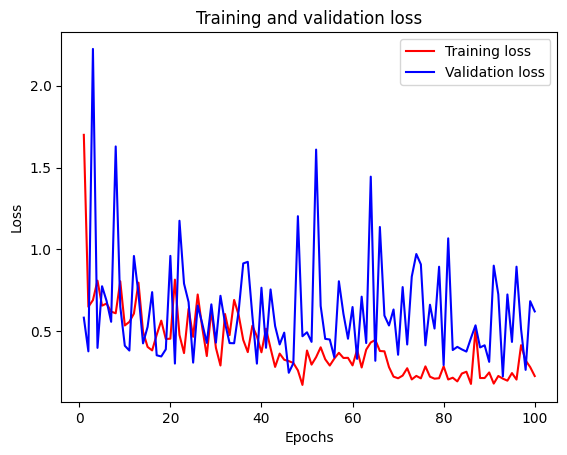

In [19]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs+1))
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

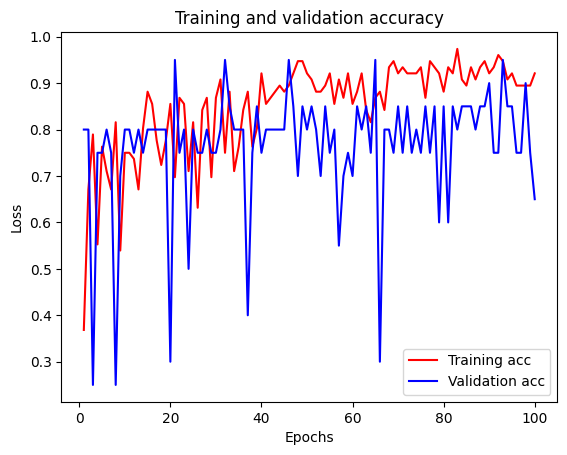

In [20]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()